# Histograms with numpy
The `numpy` library has a `histogram` function returning the histogram's values and the bin edges, which differ in size by one.  This notebook is to understand how things are calculated exactly and plotted.

---
tags: statistics, visualization, histograms, numpy

# Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data `a`

In [2]:
rng = np.random.RandomState(10)  # deterministic random data
n = 5
a = np.hstack((rng.normal(size=n),
               rng.normal(loc=5, scale=2, size=n)))

# Continuous random variables

Fix the bins:

In [3]:
bmin = int(np.floor(a.min()))
bmax = int(np.ceil(a.max())) + 1
bins = range(bmin, bmax)

Calculate histogram:

In [4]:
counts, bin_edges = np.histogram(a, bins=bins)

**Note:** `bin_edges` has length **one more** than `hist` hence we use `bin_edges[:-1]`.

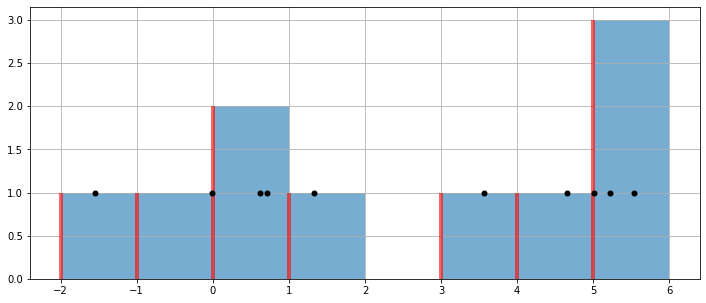

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(a, bins=bins, alpha=.6);
ax.vlines(bin_edges[:-1], 0, counts, linestyles='-', colors='red', lw=4, alpha=.6);
ax.plot(a, np.ones(len(a)), 'k.', markeredgewidth=3)
ax.grid();

# Discrete random variables

In [6]:
# Generate data
mu = 3
sz = 20
a = poisson.rvs(mu, size=sz)
# Set bins
bmin = int(np.floor(a.min()))
bmax = int(np.ceil(a.max())) + 1
bins = range(bmin, bmax)
# Calculate histogram
counts, bin_edges = np.histogram(a, bins=bins)

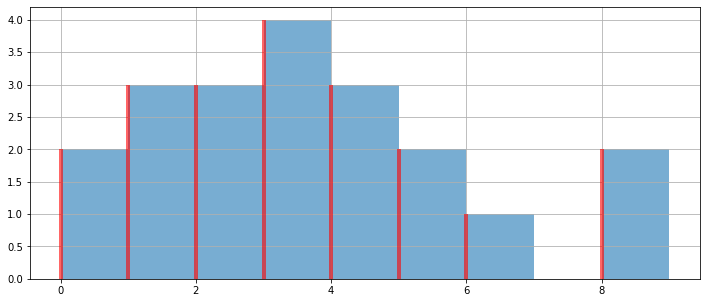

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(a, bins=bins, alpha=.6);
ax.vlines(bin_edges[:-1], 0, counts, linestyles='-', colors='red', lw=4, alpha=.6);
ax.grid();

For verification, list values encountered in `a` and their counts:

In [8]:
# list(zip(range(len(a)+1), np.bincount(a)))  # np.bincount ok since values of a are non-negative integers
list(zip(*np.unique(a, return_counts=True)))

[(0, 2), (1, 3), (2, 3), (3, 4), (4, 3), (5, 2), (6, 1), (9, 2)]

In [9]:
pd.DataFrame(list(zip(*np.unique(a, return_counts=True))), columns=['value', 'count'])

,value,count
0,0,2
1,1,3
2,2,3
3,3,4
4,4,3
5,5,2
6,6,1
7,9,2
